### This notebook will demo the data augmentation features found in `nussl.core.effects`

To use, clone my fork of nussl at [https://github.com/abugler/nussl_augmentaton_notebook]

In [18]:
import nussl
# import nussl.core.effects as effects
from nussl.datasets.hooks import MUSDB18
import matplotlib.pyplot as plt

In [35]:
musdb = MUSDB18(download=True)
mix_and_sources = musdb.process_item(0)
mix = mix_and_sources["mix"]

This is what the unaltered track sounds like, as well as the spectrogram.

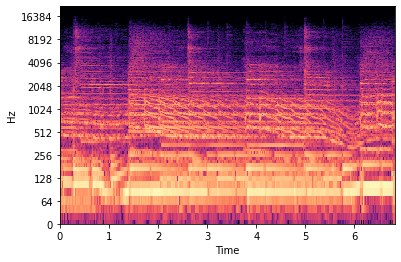

In [56]:
mix.embed_audio()3
nussl.utils.visualize_spectrogram(mix, y_axis="log")

To apply any effect, first the effect must be added to the AudioSignal's effect chain as such. 
```
audio_signal.effect(params)
```
Multiple effects can be used in succession. 
```
audio_signal.tremolo(10, .7).high_pass(600, width=100)
```
After doing so, you may make a copy of the AudioSignal with the effects applied. 
```
new_signal = audio_signal.build_effects()
```
Alternatively, you may instead overwrite the AudioSignal's `audio_data`, with the new `audio_data` with the effects applied, by using the `overwrite` flag. 
```
audio_signal.build_effects()
```
Calling `build_effects()` deletes the previous effects chain. To preserve the effects chain for later use, use the `reset` flag.
```
audio_signal.build_effects(reset=False)
```

### Time stretching
`AudioSignal.time_stretch(factor)`


Stretches the audio signal by a factor of `stretch factor`. For example, when `stretch_factor=2`, then the audio_data becomes two times faster, and when `stretch_factor=.5`, then the audio_data becomes two times slower. 

/exports/home/abugler/nussl/nussl/core/audio_signal.py:1297: UserWarning: Shape of new audio_data does not match current audio_data.
  warnings.warn('Shape of new audio_data does not match current audio_data.')


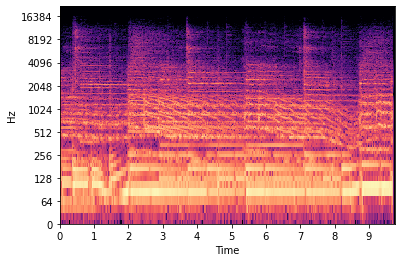

In [20]:
# Slower
slow_mix = mix.time_stretch(.7).build_effects()
slow_mix.embed_audio()
nussl.utils.visualize_spectrogram(slow_mix, y_axis="log")

/exports/home/abugler/nussl/nussl/core/audio_signal.py:1297: UserWarning: Shape of new audio_data does not match current audio_data.
  warnings.warn('Shape of new audio_data does not match current audio_data.')


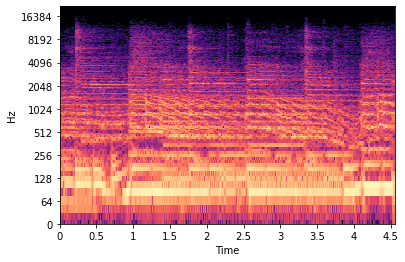

In [21]:
# Faster
fast_mix = mix.time_stretch(1.5).build_effects()
fast_mix.embed_audio()
nussl.utils.visualize_spectrogram(fast_mix, y_axis="log")

### Pitch Shifting 

`AudioSignal.pitch_shift(shift)`

Shifts the pitches up by `shift` half steps. If `shift` is negative, the audio is shifted down by `shift` half steps.

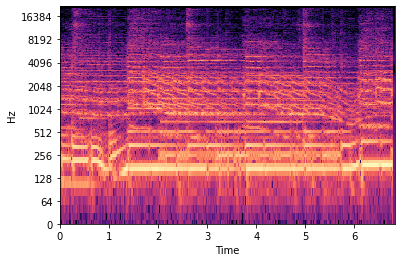

In [45]:
# Higher
high_mix = mix.pitch_shift(12).build_effects()
high_mix.embed_audio()
nussl.utils.visualize_spectrogram(high_mix, y_axis="log")

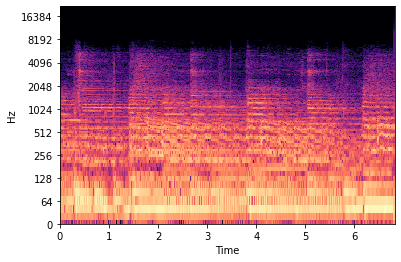

In [23]:
# Lower
low_mix = mix.pitch_shift(-12).build_effects()
low_mix.embed_audio()
nussl.utils.visualize_spectrogram(low_mix, y_axis="log")

### Low pass and high pass

`AudioSignal.low_pass(freq, poles=2, width_type="h", width=.707)`

`AudioSignal.high_pass(freq, poles=2, width_type="h", width=.707)`

Implements low and high pass, where `freq` is the thresholds of each filter. `poles` is the number poles in the filter. Each filter has width of `width` units of `width_type`. 

`width_type` can be any of the following:
   - `h`: Hz
   - `q`: Q-factor
   - `o`: octave
   - `s`: slope
   - `k`: kHz

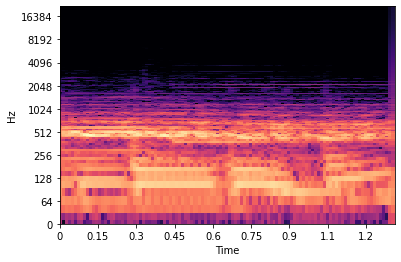

In [46]:
# Low pass
low_pmix = mix.low_pass(512, width=30).build_effects()
low_pmix.embed_audio()
nussl.utils.visualize_spectrogram(low_pmix, y_axis="log")

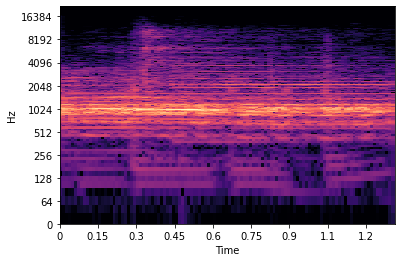

In [47]:
# High pass
high_pmix = mix.high_pass(1024, width=30).build_effects()
high_pmix.embed_audio()
nussl.utils.visualize_spectrogram(high_pmix, y_axis="log")

### Tremolo and Vibrato

`AudioSignal.tremolo(mod_freq, mod_depth)`

`AudioSignal.vibrato(mod_freq, mod_depth)`

Applys tremolo/vibrato filter on the audio signal, with a modulation frequency of `mod_freq` Hz, and modulation amplitude of `mod_depth`.

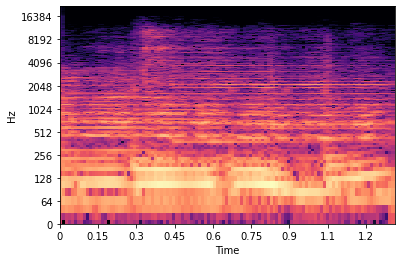

In [55]:
# tremolo
trem_mix = mix.tremolo(5, .4).build_effects()
trem_mix.embed_audio()
nussl.utils.visualize_spectrogram(trem_mix, y_axis="log")

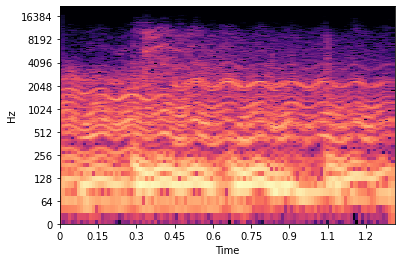

In [50]:
# vibrato
vib_mix = mix.vibrato(8, .7).build_effects()
vib_mix.embed_audio()
nussl.utils.visualize_spectrogram(vib_mix, y_axis="log")

### Emphasis
```
AudioSignal.emphasis(level_in, level_out, _type='col', mode='production')
```
An emphasis filter boosts frequency ranges the most suspectible to noise in a medium. When restoring sounds from such a medium, a de-emphasis filter is used to de-boost boosted frequencies. 
`level_in` and `level_out` are input and output gain respectively. `_type` denotes the medium. If `mode` is `production`, then a emphasis filter is applied. If it is `reproduction`, then a de-emphasis filter is applied. 

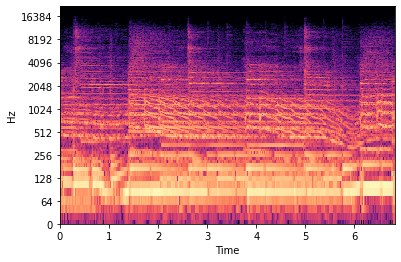

In [28]:
level_in = 1
level_out = .8
_type = "riaa"
riaa_mix = mix.emphasis(level_in, level_out, _type=_type)
riaa_mix.embed_audio()
nussl.utils.visualize_spectrogram(riaa_mix, y_axis="log")

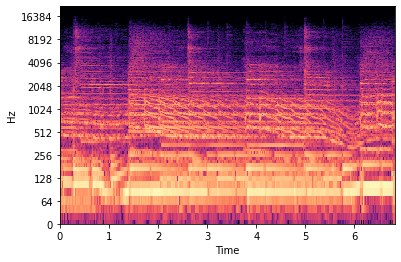

In [29]:
_type = "cd"
cd_mix = mix.emphasis(level_in, level_out, _type=_type)
cd_mix.embed_audio()
nussl.utils.visualize_spectrogram(cd_mix, y_axis="log")

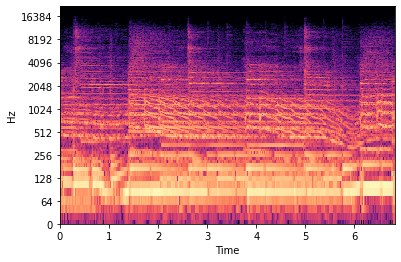

In [30]:
_type = "col"
col_mix = mix.emphasis(level_in, level_out, _type=_type)
col_mix.embed_audio()
nussl.utils.visualize_spectrogram(col_mix, y_axis="log")

### Chorus
```
AudioSignal.chorus(delays, decays, speeds, depths, in_gain=.4, out_gain=.4)
```
Applies a chorus filter to the audio signal. `decays`, `delays`, `speeds`, and `depths` are lists, where `decays[i]`, `delays[i]`, `speeds[i]`, and `depths[i]` denote the decay, delay, speed, and depth for chorus filter `i`. Delays are in milliseconds, while decay, speed, and depths must be between 0 and 1, as they are factors of the original signal. [Citation needed] `in_gain` and `out_gain` denote input and output gain respectively. 

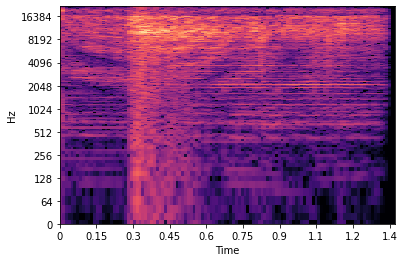

In [31]:
## Apply two chorus filters
delays = [40, 50]
decays = [.9, .8]
speeds = [.7, .6]
depths = [.9, .5]
chor_mix = mix.chorus(delays, decays, speeds, depths).build_effects()
chor_mix.embed_audio()
nussl.utils.visualize_spectrogram(chor_mix, y_axis="log")

### Phaser
```
AudioSignal.phaser(in_gain=.4, out_gain=.74, delay=3, decay=.4, speed=.5, _type="triangular")
```

Applies a phaser effect to the audio signal. `in_gain` and `out_gain` denote input and output gain respectively. `delay` denotes the delay of the copied signal in milliseconds. `decay` and `speed` are factors of the original signal, and must be between 0 and 1. `_type` denotes the type of modulation, which may be either `"triangular"` or `"sinusoidal"`.

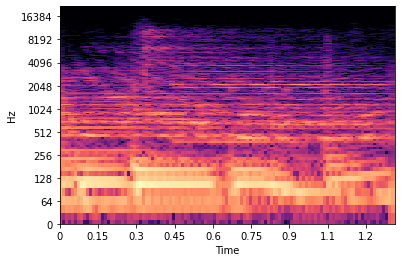

In [32]:
in_gain = 1
out_gain = .8
delay = 70
decay = .7
speed = .8
_type = "triangular"
phas_mix = mix.phaser(in_gain=in_gain, out_gain=out_gain, delay=delay, 
                      decay=decay, speed=speed, _type=_type).build_effects()
phas_mix.embed_audio()
nussl.utils.visualize_spectrogram(phas_mix, y_axis="log")

### Flanger
```
AudioSignal.flanger(delay=0, depth=2, regen=0, width=71, speed=.5, phase=25, shape="sinusoidal", interp="linear")
```

Applies a flanger filter to an AudioSignal.
`delay` denotes base delay in ms between original signal and copy. Must be between 0 and 30.
`depth` denotes sweep delay in ms. Must be between 0 and 10.
`regen` denotes percentage regeneration, or delayed signal feedback. Must be between -95 and 95.
`width` denotes percentage of delayed signal. Must be between 0 and 100.
`speed` denotes sweeps per second. Must be in .1 to 10
`shape` is the swept wave shape, Must be `"triangular"` or `"sinusoidal"`.
`phase` (is the swept wave percentage-shift for multi channel. Must be between 0 and 100.
`interp` denotes type of delay Line interpolation. Must be `"linear"` or `"quadratic"`.

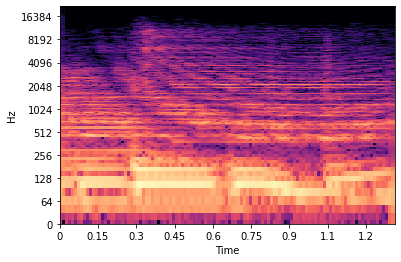

In [33]:
delay = 20
depth = 5
regen = 0
width = 60
speed = .7
phase = 30
shape = "sinusoidal"
interp = "linear"
flang_mix = mix.flanger(delay=delay,depth=depth, regen=regen, width=width, 
                speed=speed, phase=phase, shape=shape, interp=interp).build_effects()
flang_mix.embed_audio()
nussl.utils.visualize_spectrogram(flang_mix, y_axis="log")

### Compressor
```
AudioSignal.compressor(level_in, mode="downward", reduction_ratio=2,
               attack=20, release=250, makeup=1, knee=2.8284, link="average",
               detection="rms", mix=1, threshold=.125)
```
Applies a compressor signal to an AudioSignal. The information about all of these parameters can be found at https://ffmpeg.org/ffmpeg-all.html#acompressor

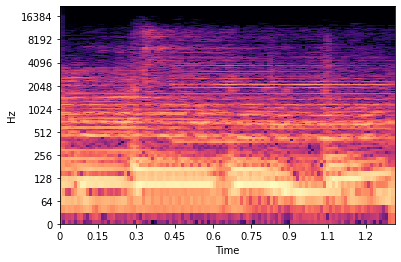

In [37]:
level_in = 1
mode="downward"
reduction_ratio=2
attack=20
release=250
makeup=1
knee=2.8284
link="average"
detection="rms"
_mix=1
threshold=.125

compress_mix = mix.compressor(level_in=level_in,reduction_ratio=reduction_ratio, attack=attack, 
                    release=release, makeup=makeup,knee=knee, link=link, detection=detection, 
                    mix=_mix, threshold=threshold).build_effects()
compress_mix.embed_audio()
nussl.utils.visualize_spectrogram(compress_mix, y_axis="log")

### Equalizer
```
AudioSignal.equalizer(bands)
```

Applies an equalizer filter to an AudioSignal. `bands` must be a list of dictionaries, one dictionary for each band. 

A dictionary must contain the following key-value pairs. 
 - `"chn"`: List of channel numbers to apply filter. This is a list of ints. 
 - `"f"`: Central Frequency
 - `"w"`: Width of the band in Hz
 - `"g"`: Band gain in dB
 
 
A dictionary may also contain `"t"`, which denotes the filter type for band. It may be either 0, for Butterworth, 1, for Chebyshev type 1, 2, for Chebyshev type 2. Defaults to 0.

In [38]:
# It may be helpful to know the number of channels first
num_chan = mix.num_channels

In [39]:
bands = [
    {
        "chn": list(range(num_chan)),
        "f": 512,
        "w": 300,
        "g": 5
    },
    {
        "chn": list(range(num_chan)),
        "f": 1024,
        "w": 100,
        "g": 2
        
    }
]
equal_mix = mix.equalizer(bands).build_effects()
equal_mix.embed_audio()
nussl.utils.visualize_spectrogram(equal_mix, y_axis="log")

TypeError: get() takes no keyword arguments